#### By: Peyman Shahidi
#### Created: Nov 11, 2025
#### Last Edit: Dec 6, 2025

<br>

In [54]:
#Python
import getpass
import numpy as np
import pandas as pd
from collections import defaultdict
import itertools
import random 

## formatting number to appear comma separated and with two digits after decimal: e.g, 1000 shown as 1,000.00
pd.set_option('float_format', "{:,.2f}".format)

import matplotlib.pyplot as plt
#%matplotlib inline
#from matplotlib.legend import Legend

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 200)

In [55]:
main_folder_path = ".."
input_data_path = f"{main_folder_path}/data"
output_data_path = f'{input_data_path}/computed_objects'
output_plot_path = f"{main_folder_path}/writeup/plots"

In [56]:
# Create directories if they don't exist
import os

for path in [output_data_path, output_plot_path]:
    if not os.path.exists(path):
        os.makedirs(path)

In [57]:
# Read the merged data
merged_data = pd.read_csv(f"{input_data_path}/computed_objects/ONET_Eloundou_Anthropic_GPT/ONET_Eloundou_Anthropic_GPT.csv")

# Print number of unique occupations and tasks
print(f"Number of unique occupations: {merged_data['O*NET-SOC Code'].nunique()}")
print(f"Number of unique tasks: {merged_data['Task ID'].nunique()}\n\n")



# Calculate share of occupations without any AI exposed tasks
group = 'O*NET-SOC Code'
merged_data['is_ai_exposed'] = merged_data['human_labels'].isin(['E1']).astype(int)
ai_task_counts = (
        merged_data.groupby(group)['is_ai_exposed'].sum()
        .rename('num_ai_exposed').reset_index()
    )
num_occupations_no_ai_exposed_tasks = (ai_task_counts['num_ai_exposed'] == 0).sum()
total_occupations = ai_task_counts.shape[0]
share_no_ai_exposed_tasks = num_occupations_no_ai_exposed_tasks / total_occupations * 100
print(f"Number of occupations without any AI-exposed tasks: {num_occupations_no_ai_exposed_tasks:,} out of {total_occupations:,}")
print(f"Share of occupations without any AI-exposed tasks: {share_no_ai_exposed_tasks:.2f}%")

# Calculate share of occupations without any AI executed tasks
merged_data['is_ai_task'] = merged_data['label'].isin(['Automation', 'Augmentation']).astype(int)
ai_task_counts = (
        merged_data.groupby(group)['is_ai_task'].sum()
        .rename('num_ai_tasks').reset_index()
    )
num_occupations_no_ai_tasks = (ai_task_counts['num_ai_tasks'] == 0).sum()
total_occupations = ai_task_counts.shape[0]
share_no_ai_tasks = num_occupations_no_ai_tasks / total_occupations * 100
print(f"\nNumber of occupations without any AI-executed tasks: {num_occupations_no_ai_tasks:,} out of {total_occupations:,}")
print(f"Share of occupations without any AI-executed tasks: {share_no_ai_tasks:.2f}%")

Number of unique occupations: 872
Number of unique tasks: 17920


Number of occupations without any AI-exposed tasks: 267 out of 872
Share of occupations without any AI-exposed tasks: 30.62%

Number of occupations without any AI-executed tasks: 317 out of 872
Share of occupations without any AI-executed tasks: 36.35%


Number of Occupations with at least one AI-Exposed task: 605


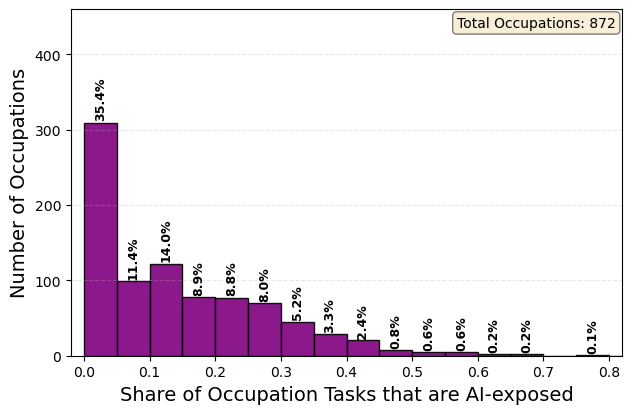

In [58]:
groups_list = ['O*NET-SOC Code'] # ['O*NET-SOC Code', 'Minor_Group_Code', 'Major_Group_Code']
group_labels = ['Occupation'] # ['Occupation', 'Minor Group', 'Major Group']

fig, axes = plt.subplots(1, len(groups_list), figsize=(6.5 * len(groups_list), 4.25))

if len(groups_list) == 1:
    axes = [axes]

for ax, group, label in zip(axes, groups_list, group_labels):

    merged_data['is_ai_exposed'] = merged_data['human_labels'].isin(['E1']).astype(int)

    ai_task_counts = (
        merged_data.groupby(group)['is_ai_exposed'].sum()
        .rename('num_ai_exposed').reset_index()
    )
    total_task_counts = (
        merged_data.groupby(group)['Task ID'].nunique()
        .rename('total_num_tasks').reset_index()
    )

    ai_task_share = ai_task_counts.merge(total_task_counts, on=group)
    ai_task_share['ai_task_share'] = ai_task_share['num_ai_exposed'] / ai_task_share['total_num_tasks']
    print('Number of Occupations with at least one AI-Exposed task:', merged_data.loc[merged_data['is_ai_exposed'] == 1, group].nunique())

    # Plot histogram
    counts, bins, _ = ax.hist(
        ai_task_share['ai_task_share'],
        bins=np.arange(0, 1.1, 0.05),
        edgecolor='black',
        color='purple',
        alpha=0.9
    )
    ax.set_xlabel(f'Share of {label} Tasks that are AI-exposed', fontsize=14)
    ax.set_ylabel(f'Number of {label}s', fontsize=14)
    ax.set_xlim(-0.02, 0.82)
    ax.set_ylim(0, 460)

    # Add percentage labels
    total_groups = len(ai_task_share)
    for count, bin_start, bin_end in zip(counts, bins[:-1], bins[1:]):
        if count > 0:
            pct = 100 * count / total_groups
            ax.text(
                (bin_start + bin_end) / 2,
                count + (counts.max() / 100),
                f'{pct:.1f}%',
                ha='center',
                va='bottom',
                fontsize=9,
                fontweight='bold',
                rotation=90
            )

    ax.text(
        0.7,
        0.98,
        f'Total {label}s: {total_groups:,}',
        transform=ax.transAxes,
        fontsize=10,
        va='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    )

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig(f"{output_plot_path}/ONET_Eloundou_Anthropic_GPT/ai_exposed_task_share_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


Number of Occupations with at least one AI-Executed task: 555


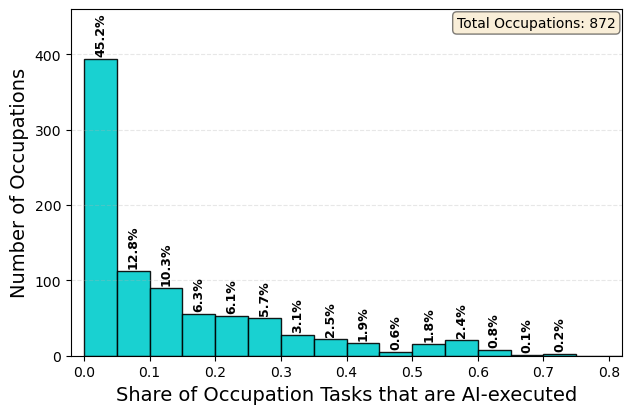

In [59]:
groups_list = ['O*NET-SOC Code'] # ['O*NET-SOC Code', 'Minor_Group_Code', 'Major_Group_Code']
group_labels = ['Occupation'] # ['Occupation', 'Minor Group', 'Major Group']

fig, axes = plt.subplots(1, len(groups_list), figsize=(6.5 * len(groups_list), 4.25))

if len(groups_list) == 1:
    axes = [axes]

for ax, group, label in zip(axes, groups_list, group_labels):

    merged_data['is_ai_task'] = merged_data['label'].isin(['Automation', 'Augmentation']).astype(int)

    ai_task_counts = (
        merged_data.groupby(group)['is_ai_task'].sum()
        .rename('num_ai_tasks').reset_index()
    )
    total_task_counts = (
        merged_data.groupby(group)['Task ID'].nunique()
        .rename('total_num_tasks').reset_index()
    )

    ai_task_share = ai_task_counts.merge(total_task_counts, on=group)
    ai_task_share['ai_task_share'] = ai_task_share['num_ai_tasks'] / ai_task_share['total_num_tasks']
    print('Number of Occupations with at least one AI-Executed task:', merged_data.loc[merged_data['is_ai_task'] == 1, group].nunique())

    # Plot histogram
    counts, bins, _ = ax.hist(
        ai_task_share['ai_task_share'],
        bins=np.arange(0, 1.1, 0.05),
        edgecolor='black',
        color='#00CCCC',
        alpha=0.9
    )
    ax.set_xlabel(f'Share of {label} Tasks that are AI-executed', fontsize=14)
    ax.set_ylabel(f'Number of {label}s', fontsize=14)
    ax.set_xlim(-0.02, 0.82)
    ax.set_ylim(0, 460)

    # Add percentage labels
    total_groups = len(ai_task_share)
    for count, bin_start, bin_end in zip(counts, bins[:-1], bins[1:]):
        if count > 0:
            pct = 100 * count / total_groups
            ax.text(
                (bin_start + bin_end) / 2,
                count + (counts.max() / 100),
                f'{pct:.1f}%',
                ha='center',
                va='bottom',
                fontsize=9,
                fontweight='bold',
                rotation=90
            )

    ax.text(
        0.7,
        0.98,
        f'Total {label}s: {total_groups:,}',
        transform=ax.transAxes,
        fontsize=10,
        va='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    )

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig(f"{output_plot_path}/ONET_Eloundou_Anthropic_GPT/ai_executed_task_share_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


In [60]:
# import numpy as np
# import matplotlib.pyplot as plt
# import os

# fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# groups_list = ['O*NET-SOC Code', 'Minor_Group_Code', 'Major_Group_Code']
# group_labels = ['Occupation', 'Minor Group', 'Major Group']

# for ax, group, label in zip(axes, groups_list, group_labels):
#     # --- 1. Keep only AI tasks ---
#     ai_tasks = merged_data[merged_data['label'].isin(['Automation', 'Augmentation'])]

#     # --- 2. Count AI tasks per group ---
#     ai_counts = (
#         ai_tasks.groupby(group)['Task ID']
#         .nunique()
#         .reset_index(name='num_ai_tasks')
#     )

#     # --- 3. Compute each group’s share of all AI tasks ---
#     total_ai_tasks = ai_counts['num_ai_tasks'].sum()
#     ai_counts['ai_task_fraction'] = ai_counts['num_ai_tasks'] / total_ai_tasks

#     # --- 4. Compute the share of groups exceeding each fraction threshold ---
#     max_frac = ai_counts['ai_task_fraction'].max() if not ai_counts.empty else 0
#     ns = np.linspace(0, max_frac, 50)
#     total_groups = len(ai_counts)
#     fractions = [
#         (ai_counts['ai_task_fraction'] > n).sum() / total_groups if total_groups else 0
#         for n in ns
#     ]

#     # --- 5. Plot ---
#     ax.plot(ns, fractions, marker='o', linestyle='-')
#     ax.set_xlabel(f'Fraction of total AI tasks belonging to {label}')
#     ax.set_ylabel(f'Fraction of {label}s with > fraction of AI tasks')
#     ax.set_title(f'{label}: share of groups with > given AI-task share')
#     ax.set_xlim(0, max_frac * 1.05)
#     ax.set_ylim(0, 0.82)

#     # Add grid for better readability
#     ax.grid(axis='y', linestyle='--', alpha=0.3)

#     # Annotate a few thresholds
#     for frac_cut in [0.001, 0.01, 0.05]:
#         if frac_cut <= max_frac:
#             y = (ai_counts['ai_task_fraction'] > frac_cut).sum() / total_groups
#             ax.text(frac_cut, y, f'{100*y:.1f}%', fontsize=8, va='bottom', ha='center')

# # --- 6. Save plot ---
# out_dir = f"{output_plot_path}/ONET_Eloundou_Anthropic_GPT"
# os.makedirs(out_dir, exist_ok=True)
# plt.tight_layout()
# plt.savefig(f"{out_dir}/ai_groups_fraction_over_taskshare.png", dpi=300, bbox_inches='tight')
# plt.show()

### DWA with Tasks in Multiple Occupations Stats

In [61]:
# Get list of DWAs with tasks in multiple occupations
dwa_list_path = f"{input_data_path}/computed_objects/similar_dwa_tasks/similarTasks"

# Read all CSV files
import glob
dwa_csv_files = glob.glob(os.path.join(dwa_list_path, "*.csv"))
print(f"Found {len(dwa_csv_files)} DWA CSV files.")

# Load them into DataFrames, skipping 1-row files
dwa_dfs = []
skipped_files_count = 0
for f in dwa_csv_files:
    df = pd.read_csv(f)
    if len(df) > 1: # Skip if DWA contains only one task
        dwa_dfs.append(df)
    else:
        skipped_files_count += 1
print(f"Skipped {skipped_files_count} DWA files with only one task.")
    

# Combine into one DataFrame
df_all = pd.concat(dwa_dfs, ignore_index=True)
repetitive_dwa_task_ids = df_all['Task ID'].unique().tolist()
repetitive_dwa_task_titles = df_all['Task Title'].unique().tolist()
print(f"Found {len(repetitive_dwa_task_ids)} tasks related to these DWAs.")

Found 2047 DWA CSV files.
Skipped 47 DWA files with only one task.
Found 13535 tasks related to these DWAs.


In [62]:

# Create a DWA-level dataset with number of tasks and occupations per DWA, as well as fraction of manual, automation, and augmentation tasks per DWA
merged_data = pd.read_csv(f"{input_data_path}/computed_objects/ONET_Eloundou_Anthropic_GPT/ONET_Eloundou_Anthropic_GPT.csv")
merged_data['is_manual'] = merged_data['label'] == 'Manual'
merged_data['is_automation'] = merged_data['label'] == 'Automation'
merged_data['is_augmentation'] = merged_data['label'] == 'Augmentation'


# Merge back DWA ID and DWA Titles to the merged_data
dwa_task_mapping = pd.read_csv(f"{input_data_path}/computed_objects/similar_dwa_tasks/dwa_task_mapping.csv")
print(f'Length of merged_data before merging DWA info: {merged_data.shape[0]}')
merged_data = merged_data.merge(dwa_task_mapping, on=['Task ID', 'Task Title', 'O*NET-SOC Code', 'Occupation Title'], how='left')
print(f'Length of merged_data after merging DWA info: {merged_data.shape[0]}')

Length of merged_data before merging DWA info: 17925
Length of merged_data after merging DWA info: 22267


In [63]:
# Show selected DWAs in the merged_data
selected_dwas = ['4.A.2.a.4.I07.D02', '4.A.3.b.6.I03.D07', '4.A.3.b.6.I05.D03']

# Before filter
df_selected_dwas = merged_data[merged_data['DWA ID'].isin(selected_dwas)][['DWA ID', 'DWA Title', 'Task ID', 'Task Title', 'O*NET-SOC Code', 'Occupation Title', 'label']]
to_save_df = df_selected_dwas.sort_values(by=['DWA ID', 'O*NET-SOC Code', 'Task ID'])
to_save_df.to_csv(f'{output_data_path}/execTypeVaryingDWA_anthropicIndex/DWAexecVaryingTypes_selectedStats_beforeFilter.csv', index=False)


# After filter
after_filter_df = pd.read_csv(f"{input_data_path}/computed_objects/execTypeVaryingDWA_anthropicIndex/merged_data_DWAexecVaryingTypes.csv")
to_save_df = after_filter_df[after_filter_df['DWA ID'].isin(selected_dwas)][['DWA ID', 'DWA Title', 'Task ID', 'Task Title', 'O*NET-SOC Code', 'Occupation Title', 'label']]
to_save_df = to_save_df.sort_values(by=['DWA ID', 'O*NET-SOC Code', 'Task ID'])
to_save_df.to_csv(f'{output_data_path}/execTypeVaryingDWA_anthropicIndex/DWAexecVaryingTypes_selectedStats_afterFilter.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '../data/computed_objects/execTypeVaryingDWA_anthropicIndex/merged_data_DWAexecVaryingTypes.csv'